In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from ordered_set import OrderedSet

In [126]:
import os
working_directory=os.getcwd()
print(working_directory)

/Users/jchen056/CTPDataScienceGroup/BA


# import files 

In [127]:
df=pd.read_csv('/Users/jchen056/CTPDataScienceGroup/data/BusinessAnalyst.csv')
df.head()


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [128]:
print("shape of the dataframe:",df.shape)
print(df.isnull().sum())
print("the number of duplicates",df.duplicated().sum())

shape of the dataframe: (4092, 17)
Unnamed: 0             0
index                  0
Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters           0
Size                   0
Founded                0
Type of ownership      0
Industry               0
Sector                 0
Revenue                0
Competitors          400
Easy Apply           400
dtype: int64
the number of duplicates 0


# Data Cleaning on Salary

In [135]:
salary_est=list(df['Salary Estimate'])

salary_re=[]
for i in salary_est:
    a=re.findall(r"\d+",i)
    salary_re.append(a)

df['salary_cleaned']=salary_re
df.head()


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_cleaned,min salary,max salary
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,"[56, 102]",56,102
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,"[56, 102]",56,102
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,"[56, 102]",56,102
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,"[56, 102]",56,102
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,"[56, 102]",56,102


In [136]:
salary_min=[]
salary_max=[]
for i in salary_re:
    if len(i)==2:
        salary_min.append(int(i[0]))
        salary_max.append(int(i[1]))
    if len(i)==1:
        salary_min.append(int(i[0]))
        salary_max.append(int(i[0]))
df['min salary']=salary_min
df['max salary']=salary_max
df.head()

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_cleaned,min salary,max salary
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,"[56, 102]",56,102
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,"[56, 102]",56,102
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,"[56, 102]",56,102
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,"[56, 102]",56,102
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,"[56, 102]",56,102


# Data Cleaning on location

<AxesSubplot:ylabel='states'>

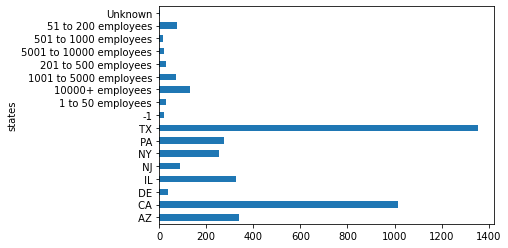

In [138]:
states=[]
for i in list(df['Location']):
    states.append(i.split(',')[-1])
df['states']=states


df.groupby('states')['states'].count().plot(kind="barh")

In [139]:
valid_states=[' AZ',' CA',' DE',' IL',
 ' NJ',
 ' NY',
 ' PA',
 ' TX']
condition_states=df.states.isin(valid_states)
df_filtered=df[condition_states]
print("new df shape:",df_filtered.shape)
df_filtered.head()

new df shape: (3692, 21)


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,...,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_cleaned,min salary,max salary,states
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,...,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,"[56, 102]",56,102,NY
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,...,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,"[56, 102]",56,102,NY
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,...,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,"[56, 102]",56,102,NJ
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,...,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,"[56, 102]",56,102,NJ
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,...,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,"[56, 102]",56,102,NY


# Data cleaning on Ownership and Sector

Text(0.5, 1.0, 'Ownership whose count>30')

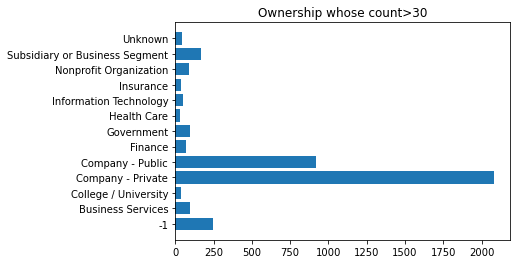

In [140]:
#df.groupby('Type of ownership')['Type of ownership'].count()
ownership_values=list(df.groupby('Type of ownership')['Type of ownership'].count())
ownership_filtering=pd.DataFrame(np.zeros((len(ownership_values),2)),columns=['ownership','count'])
ownership_filtering['ownership']=sorted(list(set(df['Type of ownership'])))
ownership_filtering['count']=ownership_values
own_fil=ownership_filtering[ownership_filtering['count']>30]
plt.barh(own_fil['ownership'],own_fil['count'])
plt.title("Ownership whose count>30")

In [141]:
valid_ownerships=['Business Services','College / University','Company - Private',
 'Company - Public', 'Finance','Government','Health Care','Information Technology','Insurance','Nonprofit Organization','Subsidiary or Business Segment']

<BarContainer object of 19 artists>

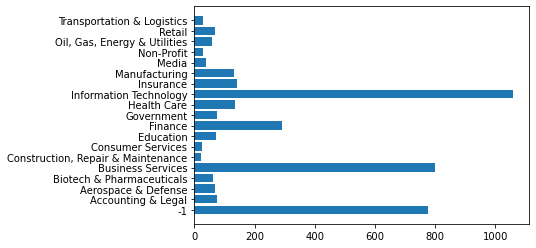

In [142]:
sector_values=sorted(list(set(df['Sector'])))
sector_fil=pd.DataFrame(np.zeros((len(sector_values),2)),columns=['sector','count'])
sector_fil['sector']=sector_values
sector_fil['count']=list(df.groupby('Sector')['Sector'].count())
sec_fil=sector_fil[sector_fil['count']>20]
plt.barh(sec_fil['sector'],sec_fil['count'])

In [143]:
valid_sectors=['Accounting & Legal',
 'Aerospace & Defense',
 'Biotech & Pharmaceuticals',
 'Business Services',
 'Construction, Repair & Maintenance',
 'Consumer Services',
 'Education',
 'Finance',
 'Government',
 'Health Care',
 'Information Technology',
 'Insurance',
 'Manufacturing',
 'Media',
 'Non-Profit',
 'Oil, Gas, Energy & Utilities',
 'Retail',
 'Transportation & Logistics']
condition_sectors=df_filtered.Sector.isin(valid_sectors)
df_fil1=df_filtered[condition_sectors]
print("new filtered df shape:",df_fil1.shape)
df_fil1

new filtered df shape: (3171, 21)


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,...,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_cleaned,min salary,max salary,states
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,...,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1,"[56, 102]",56,102,NY
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,...,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True,"[56, 102]",56,102,NY
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,...,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1,"[56, 102]",56,102,NJ
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,...,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1,"[56, 102]",56,102,NJ
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,...,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True,"[56, 102]",56,102,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686,3686,4394,Urgent - Business Analyst (Information Technol...,$58K-$103K (Glassdoor est.),Job Description\nAbout us:\n\nStaffigo is in t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,...,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,"[58, 103]",58,103,TX
3687,3687,4395,Pega Business Analyst,$58K-$103K (Glassdoor est.),• 5 yrs relevant experience in:- Experience wi...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,...,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1,"[58, 103]",58,103,TX
3688,3688,4396,Jr.Business Analyst,$58K-$103K (Glassdoor est.),Job Description\n\nNew businesses are making t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,...,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,"[58, 103]",58,103,TX
3690,3690,4398,"AVP, Business System",$58K-$103K (Glassdoor est.),We are looking for a AVP Business System Analy...,3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,...,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1,"[58, 103]",58,103,TX


# visualizations

Text(0, 0.5, 'max salary in K')

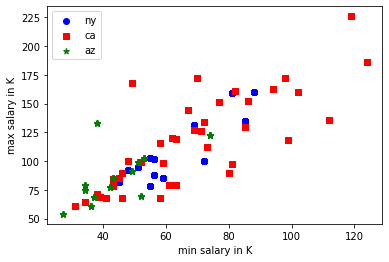

In [151]:
df_ny=df_fil1[df_fil1["states"]==' NY']
df_ca=df_fil1[df_fil1["states"]==' CA']
df_AZ=df_fil1[df_fil1["states"]==' AZ']
plt.scatter(df_ny['min salary'],df_ny['max salary'],color='blue',marker='o',label='ny')
plt.scatter(df_ca['min salary'],df_ca['max salary'],color='red',marker='s',label='ca')
plt.scatter(df_AZ['min salary'],df_AZ['max salary'],color='green',marker='*',label='az')
plt.legend()
plt.xlabel('min salary in K')
plt.ylabel('max salary in K')

Text(0, 0.5, 'max salary in K')

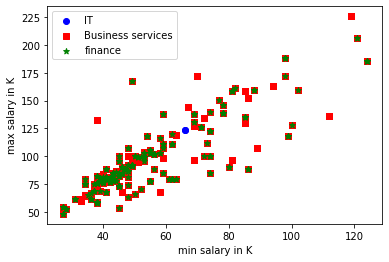

In [155]:
df_it=df_fil1[df_fil1['Sector']=='Information Technology']
df_fs=df_fil1[df_fil1['Sector']=='Business Services']
df_finance=df_fil1[df_fil1['Sector']=='Finance']
plt.scatter(df_it['min salary'],df_it["max salary"],color='blue',marker='o', label="IT")
plt.scatter(df_fs['min salary'],df_fs["max salary"],color="red",marker='s', label="Business services")
plt.scatter(df_finance['min salary'],df_finance["max salary"],color="green",marker='*', label="finance")
plt.legend()
plt.xlabel('min salary in K')
plt.ylabel('max salary in K')